In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from helper import util

In [8]:
# load raw data into memory

raw_data = pd.read_excel('data store/Bankruptcy_data_Final.xlsx')
print(raw_data.shape)
raw_data.head()

(92872, 15)


,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [9]:
# Find inter-correlation between features

corr_feature_set = raw_data.copy()
corr_matrix_all = corr_feature_set.corr().abs()
corr_matrix_all[corr_matrix_all == 1] = 0

high_cor_features = corr_matrix_all.unstack()
print(high_cor_features[high_cor_features > 0.3])

corr_matrix_target = raw_data.corr()['BK'].abs()
print(corr_matrix_target.sort_values(ascending=False))


Liquidity         Profitability       0.470622
                  Return on Equity    0.582335
Profitability     Liquidity           0.470622
                  Productivity        0.434535
Productivity      Profitability       0.434535
Return on Equity  Liquidity           0.582335
dtype: float64
BK                    1.000000
Data Year - Fiscal    0.083014
Asset Turnover        0.015191
EPS                   0.007229
Return on Equity      0.006530
Profitability         0.002454
Tobin's Q             0.001906
Operational Margin    0.001756
Employee Growth       0.001475
Assets Growth         0.001393
Productivity          0.001346
Liquidity             0.001193
Market Book Ratio     0.000882
Sales Growth          0.000187
Leverage Ratio        0.000148
Name: BK, dtype: float64


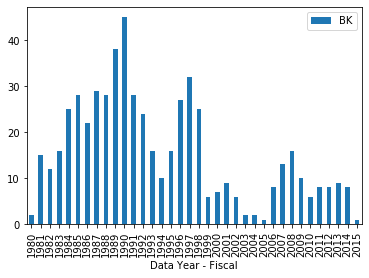

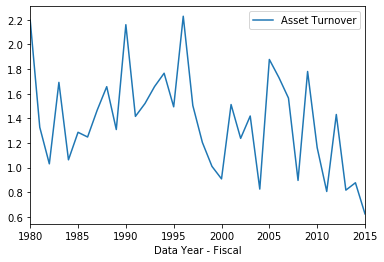

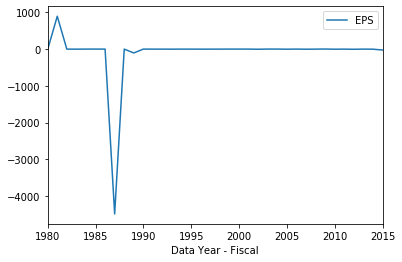

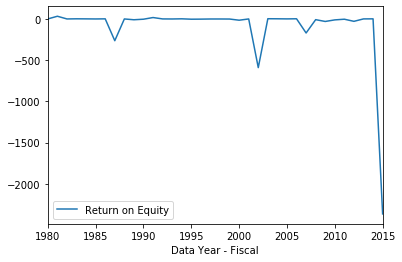

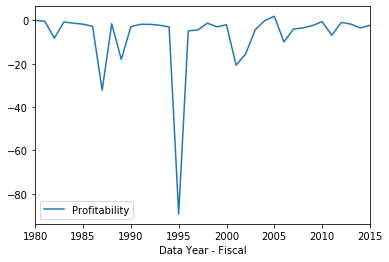

In [4]:
# EDA module:
bankruptch_records = raw_data[raw_data['BK']==1]

df_year_target = bankruptch_records[["Data Year - Fiscal", "BK"]]
df_year_target = df_year_target.groupby(['Data Year - Fiscal']).agg('count')
df_year_target.plot(kind='bar');

# Asset turnover to target prediction that equals bankruptch
df_turnover_target = bankruptch_records[["Data Year - Fiscal", "Asset Turnover"]]
df_turnover_target = df_turnover_target.groupby(['Data Year - Fiscal']).agg('mean')
df_turnover_target.plot();

# EPS to target prediction that equals bankruptch
df_eps_target = bankruptch_records[["Data Year - Fiscal", "EPS"]]
df_eps_target = df_eps_target.groupby(['Data Year - Fiscal']).agg('mean')
df_eps_target.plot();

# Return on Equity to target prediction that equals bankruptch
df_equityreturn_target = bankruptch_records[["Data Year - Fiscal", "Return on Equity"]]
df_equityreturn_target = df_equityreturn_target.groupby(['Data Year - Fiscal']).agg('mean')
df_equityreturn_target.plot();

# Profitability to target prediction that equals bankruptch
df_profitability_target = bankruptch_records[["Data Year - Fiscal", "Profitability"]]
df_profitability_target = df_profitability_target.groupby(['Data Year - Fiscal']).agg('mean')
df_profitability_target.plot();

In [11]:
# Exploratory data analysis:
# Check for missing, unique, min and max of each column

df_explore = util.df_explore_helper(raw_data)
df_explore


Shape of dataframe: (92872, 15) 


,Name,dtypes,Missing values,Unique values,First Value,Minimum,Maximum
0,Data Year - Fiscal,int64,0,39,1979.00,1.979000e+03,2017.00
1,Tobin's Q,float64,252,8559,0.98,9.283364e-03,194537.67
2,EPS,float64,5,6987,1.58,-3.840000e+05,55339.00
3,Liquidity,float64,247,6108,0.36,-2.596852e+04,1.00
4,Profitability,float64,247,9363,0.18,-7.968200e+04,140.58
5,Productivity,float64,247,6075,0.13,-5.093000e+03,1102.00
6,Leverage Ratio,float64,26,6936,1.33,-7.811000e+03,75970.38
7,Asset Turnover,float64,247,5051,1.77,-3.159000e+01,276.38
8,Operational Margin,float64,5557,7485,0.07,-3.017570e+04,394.47
9,Return on Equity,float64,8,5750,0.15,-8.887514e+04,39500.00


In [12]:
raw_data.info()
raw_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
Data Year - Fiscal    92872 non-null int64
Tobin's Q             92620 non-null float64
EPS                   92867 non-null float64
Liquidity             92625 non-null float64
Profitability         92625 non-null float64
Productivity          92625 non-null float64
Leverage Ratio        92846 non-null float64
Asset Turnover        92625 non-null float64
Operational Margin    87315 non-null float64
Return on Equity      92864 non-null float64
Market Book Ratio     92815 non-null float64
Assets Growth         86171 non-null float64
Sales Growth          86171 non-null float64
Employee Growth       85862 non-null float64
BK                    92872 non-null int64
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


Index(['Data Year - Fiscal', 'Tobin's Q', 'EPS', 'Liquidity', 'Profitability',
       'Productivity', 'Leverage Ratio', 'Asset Turnover',
       'Operational Margin', 'Return on Equity', 'Market Book Ratio',
       'Assets Growth', 'Sales Growth', 'Employee Growth', 'BK'],
      dtype='object')

bankruptcy number:  (558, 15)
non bankruptcy number:  (92314, 15)


<Figure size 432x288 with 0 Axes>

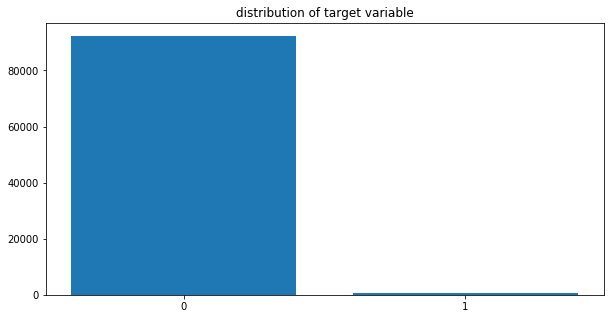

In [13]:
# Data sampling 

# Look at the binary target distribution of our prediction
# Plot the target distribution of bankruptcy against non bankruptcy record count

target_dist = raw_data['BK']

plt.clf()
plt.figure(figsize=(10,5))
target=target_dist.value_counts()
plt.bar(target.index,target)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')


display()

bk_company_num = raw_data[raw_data['BK'] == 1]
non_bk_company_num = raw_data[raw_data['BK'] == 0]
print("bankruptcy number: ", bk_company_num.shape)
print("non bankruptcy number: ", non_bk_company_num.shape)


In [14]:
# Data sampling for train and evaluation

# generate evaluation set, and training set from raw data and store to warehouse
# evaluation set will be used after model is done training, and should be balanced between 50%/50% target binary value split

util.eval_train_generator(raw_data, target="BK", split_number=50)

(100, 15)
(92770, 15)
Completed


True

In [5]:
features_dropna = ["Tobin's Q", "EPS", "Leverage Ratio", "Return on Equity", "Market Book Ratio", "Operational Margin", "Assets Growth", "Productivity", "Sales Growth", "Employee Growth"]
features_impute = ["Liquidity", "Profitability", "Asset Turnover"]
features_todrop = ["Unnamed: 0", "Liquidity"]
target = "BK"